<a href="https://colab.research.google.com/github/ThomasMills2/Quantitatively-Assessing-the-Presence-and-Effect-of-Bars-on-Stellar-Dynamics-and-Galaxy-Formation/blob/main/Single%20Sersic%20Light%20Fitting%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoconf==2024.11.13.2 autofit==2024.11.13.2 autoarray==2024.11.13.2 autogalaxy==2024.11.13.2 pyvis==0.3.2 dill==0.3.1.1 dynesty==2.1.4 emcee==3.1.6 nautilus-sampler==1.0.4 timeout_decorator==0.5.0 anesthetic==2.8.14 --no-deps
!pip install numba
!git clone https://github.com/Jammy2211/BSc_Galaxies_Project
import os
from autoconf import conf

os.chdir("/content/BSc_Galaxies_Project")

conf.instance.push(
    new_path="/content/BSc_Galaxies_Project/",
    output_path="/content/BSc_Galaxies_Project/output",
)

import numpy as np
import autogalaxy as ag
import autogalaxy.plot as aplt
from os import path

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.2/389.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.8/465.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.7/351.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=34e88ba3330b95d2d5d72ff846009c67d180612627e34be9b8d99b47e2544f9b
  Stored in directory: /root/.cache/pip/wheels/01/60/80/1622338bcecce31a5664ef01c203cc5a7b09f59588d9c07376
  Created wheel for ti

In [ ]:
import autofit as af

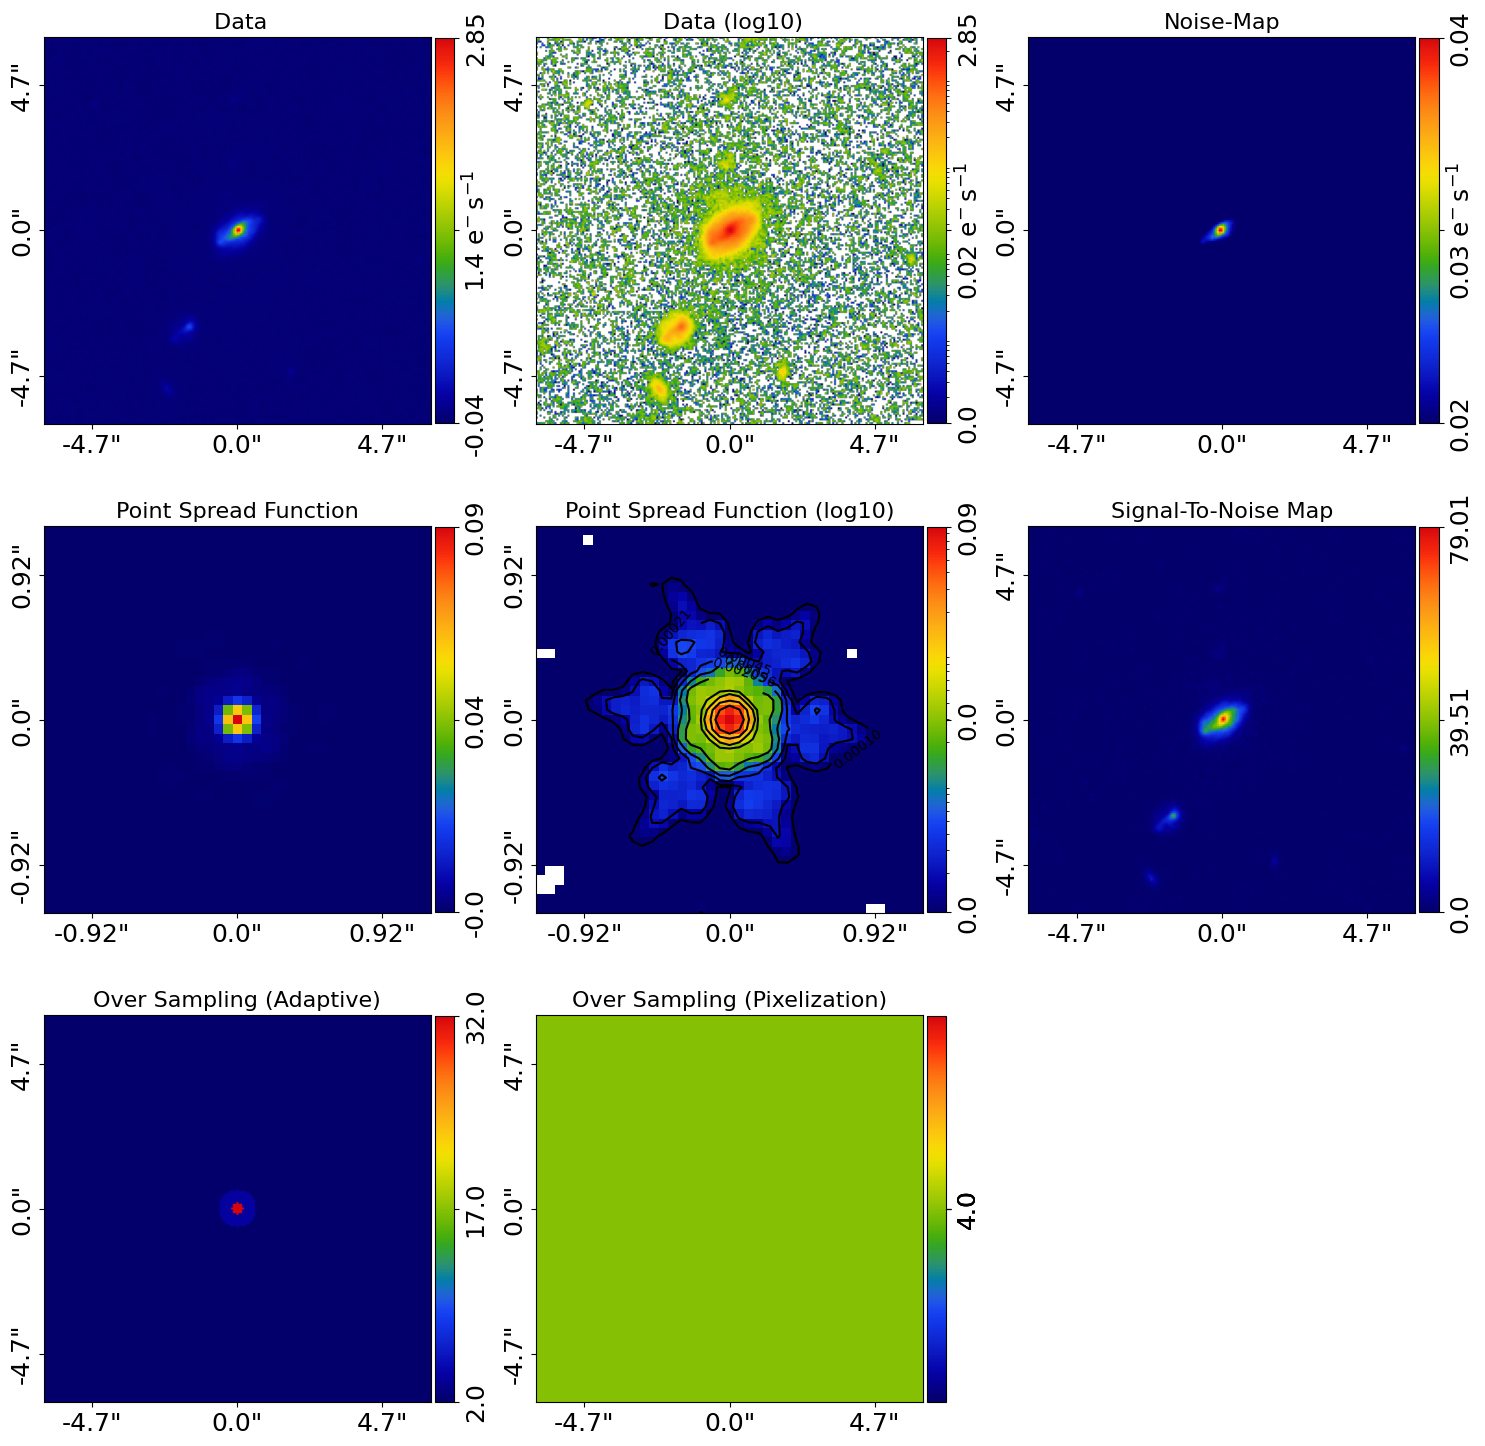

2025-04-19 15:44:39,426 - autoarray.dataset.imaging.dataset - INFO - The image and noise map of the `Imaging` objected have been padded to the dimensions(31417,). This is because the blurring region around the mask (which defines wherePSF flux may be convolved into the masked region) extended beyond the edge of the image.This can be prevented by using a smaller mask, smaller PSF kernel size or manually paddingthe image and noise-map yourself.
2025-04-19 15:44:39,429 - autoarray.dataset.imaging.dataset - INFO - IMAGING - Data masked, contains a total of 31417 image-pixels


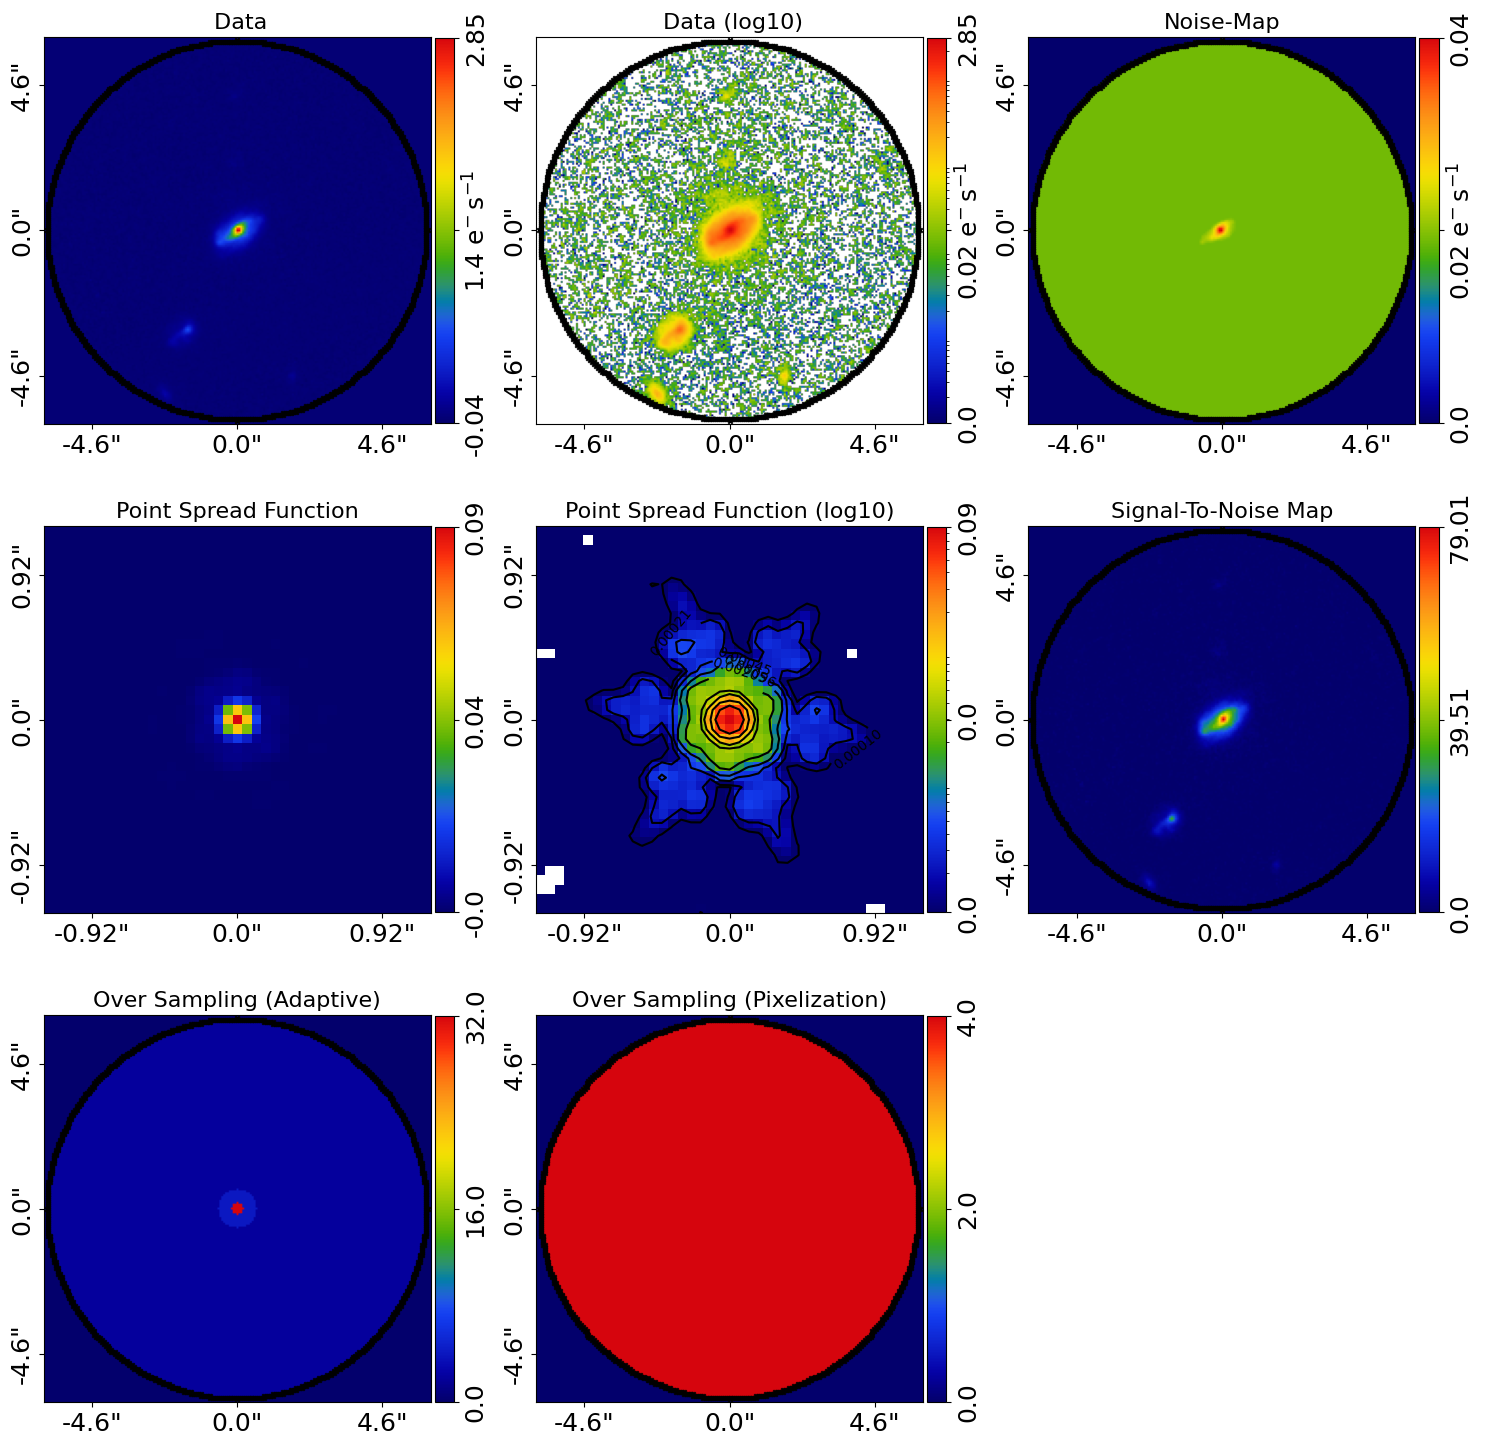

Total Free Parameters = 6

model                                                                           Collection (N=6)
    galaxies                                                                    Collection (N=6)
        galaxy                                                                  Galaxy (N=6)
            disk                                                                Sersic (N=6)

galaxies
    galaxy
        redshift                                                                0.5
        disk
            centre
                centre_0                                                        GaussianPrior [0], mean = 0.0, sigma = 0.3
                centre_1                                                        GaussianPrior [1], mean = 0.0, sigma = 0.3
            ell_comps
                ell_comps_0                                                     GaussianPrior [2], mean = 0.0, sigma = 0.3
                ell_comps_1                                      

In [ ]:
dataset_name = "dataset_8"
dataset_path = path.join("dataset", "task_6a_bars", "jwst", dataset_name)

dataset = ag.Imaging.from_fits(
    data_path=path.join(dataset_path, "data.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.06,
)

dataset_plotter = aplt.ImagingPlotter(dataset=dataset)
dataset_plotter.subplot_dataset()

# Masking
mask = ag.Mask2D.circular(
    shape_native=dataset.shape_native, pixel_scales=dataset.pixel_scales, radius=6.0
)

dataset = dataset.apply_mask(mask=mask)

dataset_plotter = aplt.ImagingPlotter(dataset=dataset)
dataset_plotter.subplot_dataset()

# Galaxy
# Disk component
disk = ag.lp.Sersic(
    centre=(0.0, 0.0),
    ell_comps=(0.0, 0.0), #x-comps was 0.3
    intensity=0.01,
    effective_radius=6.0, #was 1
    sersic_index=3.0,
)

# Galaxy model
galaxy_model = af.Model(ag.Galaxy, redshift=0.5, disk=ag.lp_linear.Sersic)

model = af.Collection(galaxies=af.Collection(galaxy=galaxy_model))

print(model.info)

Total Free Parameters = 6

model                                                                           Collection (N=6)
    galaxies                                                                    Collection (N=6)
        galaxy                                                                  Galaxy (N=6)
            disk                                                                Sersic (N=6)

galaxies
    galaxy
        redshift                                                                0.5
        disk
            centre
                centre_0                                                        UniformPrior [6], lower_limit = -1.0, upper_limit = 1.0
                centre_1                                                        UniformPrior [7], lower_limit = -1.0, upper_limit = 1.0
            ell_comps
                ell_comps_0                                                     UniformPrior [8], lower_limit = -1.5, upper_limit = 1.5
                ell_comps_

INFO:2025-04-19 15:45:53,971:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


2025-04-19 15:45:53,971 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


INFO:2025-04-19 15:45:53,986:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


2025-04-19 15:45:53,986 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-04-19 15:46:09,961 - example_0 - INFO - The output path of this fit is /content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78
2025-04-19 15:46:09,962 - example_0 - INFO - Outputting pre-fit files (e.g. model.info, visualization).
2025-04-19 15:46:12,221 - example_0 - INFO - Starting new Nautilus non-linear search (no previous samples found).
2025-04-19 15:46:12,222 - example_0 - INFO - 
            Running search where parallelization is disabled.
            
Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Stopped   | 2      | 0        | 4        | 1000     | 1.0000 | 1     | +17504.83
2025-04-19 15:53:13,961 - example_0 - INFO - Fit Running:

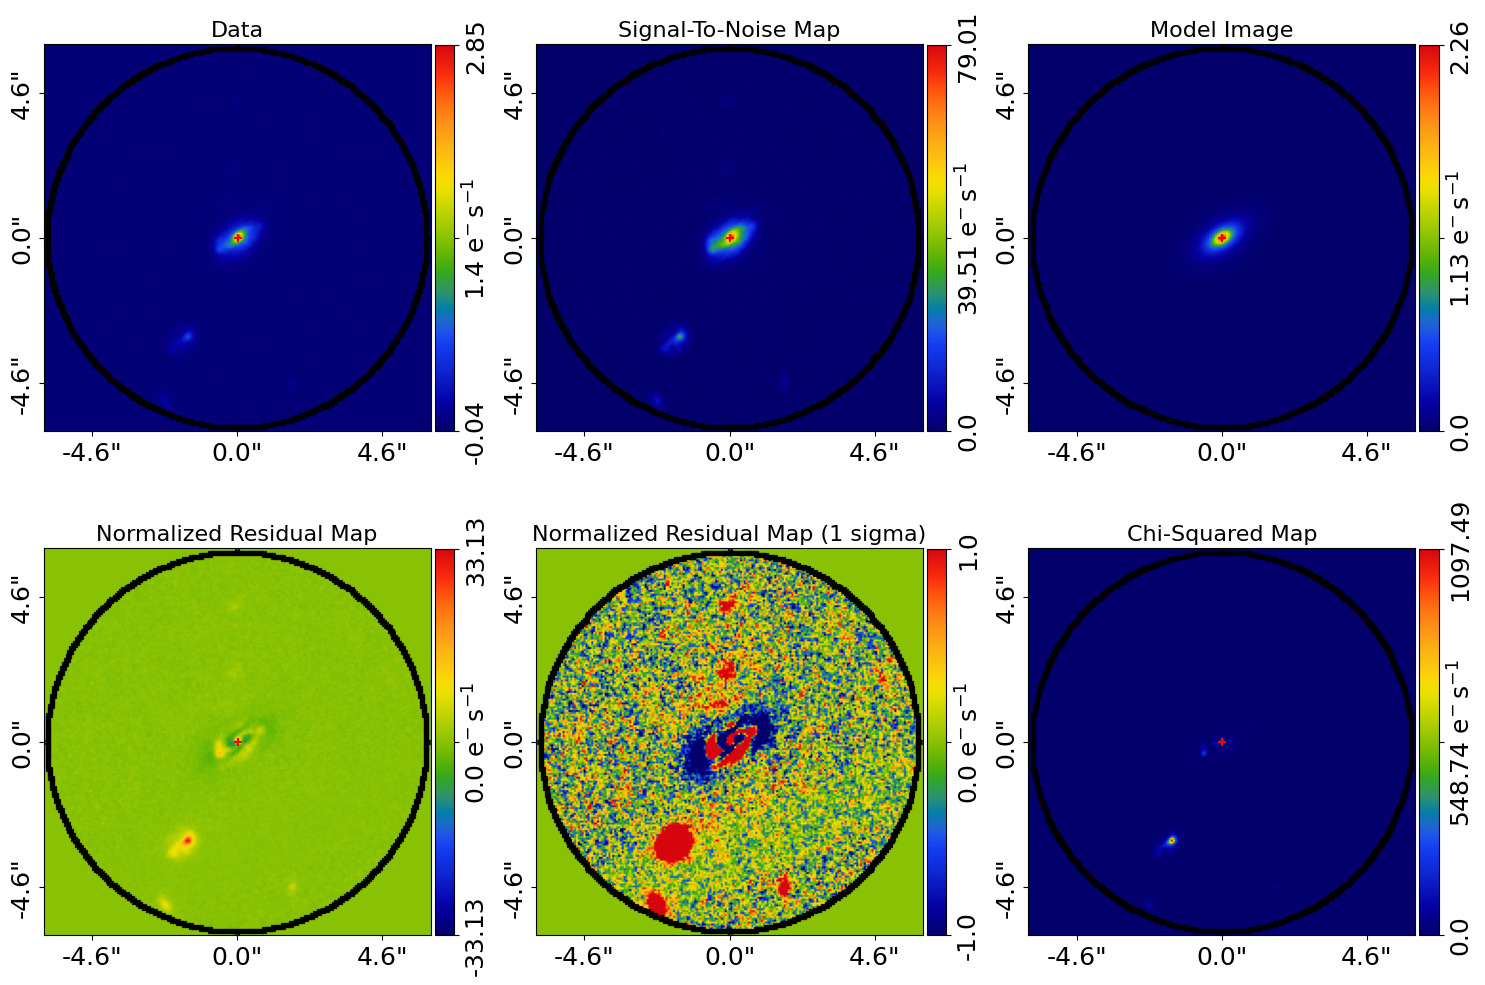

  adding: content/BSc_Galaxies_Project/output/ (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78.zip (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/ (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/profile/ (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/profile/preloads.summary (deflated 50%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/search.log (deflated 85%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/image/ (stored 0%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a231318074173c665d64ae78/image/subplot_galaxies.png (deflated 92%)
  adding: content/BSc_Galaxies_Project/output/example_0/ec2ef692a2313180

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Priors
#Priors disk
model.galaxies.galaxy.disk.centre.centre_0 = af.UniformPrior(lower_limit=-1.0, upper_limit=1.0)
model.galaxies.galaxy.disk.centre.centre_1 = af.UniformPrior(lower_limit=-1.0, upper_limit=1.0)
model.galaxies.galaxy.disk.ell_comps.ell_comps_0 = af.UniformPrior(
    lower_limit=-1.5, upper_limit=1.5
)
model.galaxies.galaxy.disk.ell_comps.ell_comps_1 = af.UniformPrior(
    lower_limit=-1.5, upper_limit=1.5
)
model.galaxies.galaxy.disk.effective_radius = af.UniformPrior(
    lower_limit=0.0, upper_limit=6.0
)
model.galaxies.galaxy.disk.sersic_index = af.UniformPrior(
    lower_limit=0.0, upper_limit=5.0
)

print(model.info)

#Analysis
analysis = ag.AnalysisImaging(dataset=dataset)

# Nested sampling algorthm
search = af.Nautilus(
    name="example_0",
    n_live=300,
    iterations_per_update=1000,
    force_x1_cpu=True # This ensures the Google Colab code runs correctly
)

print(
    """
    The non-linear search has begun running.
    This Jupyter notebook cell with progress once the search has completed - this could take a few minutes!
    """
)

result = search.fit(model=model, analysis=analysis)

print("The search has finished run - you may now continue the notebook.")

print(result.info)

fit_plotter = aplt.FitImagingPlotter(fit=result.max_log_likelihood_fit)
fit_plotter.subplot_fit()

from google.colab import files

!zip -r output.zip /content/BSc_Galaxies_Project/output
files.download("output.zip")

In [ ]:
print(result.info)

fit_plotter = aplt.FitImagingPlotter(fit=result.max_log_likelihood_fit)
fit_plotter.subplot_fit()

NameError: name 'result' is not defined

In [ ]:
from google.colab import files

!zip -r output.zip /content/BSc_Galaxies_Project/output
files.download("output.zip")

updating: content/BSc_Galaxies_Project/output/ (stored 0%)
updating: content/BSc_Galaxies_Project/output/example_0/ (stored 0%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc.zip (stored 0%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/ (stored 0%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/metadata (deflated 17%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/search.summary (deflated 35%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/model.info (deflated 81%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/files/ (stored 0%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc/files/samples.csv (deflated 73%)
updating: content/BSc_Galaxies_Project/output/example_0/05a3aef0941836ef26c536660d9472dc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>